In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer


- 결측치를 보간하는 다양한 방법들을 시각화하여 여러분들이 직접 어떤 식으로 되는구나 이 부분을 이해시켜고 하는 것!
- 넘파이에서 랜덤으로 데이터 만들어서 시각화는 예정

In [8]:
#예시 데이터 만들기

np.random.seed(0)
data = np.random.normal(10,2,100)
df = pd.DataFrame(data, columns=['Feature'])

# 결측치를 만들기

df.loc[5:10, 'Feature']= np.nan
df.loc[20:25, 'Feature']= np.nan
df.loc[40:50, 'Feature']= np.nan

In [10]:
df[5:10]

,Feature
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


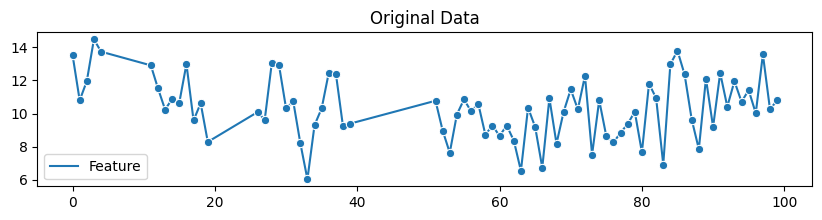

In [11]:
#원본 데이터 시각화
plt.figure(figsize=(10,2))
sns.lineplot(data=df, marker='o')
plt.title('Original Data')
plt.show()

In [13]:
# 1. 1차 선형보간법, interpolate
df_linear =df.interpolate(method = 'linear') #1차 선형보간

# 2. 2차 선형보간법, interpolate
df_quadratic =df.interpolate(method = 'quadratic') #2차 선형보간

# 3. 평균대치법
imputer_mean =SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean, columns = ['Feature'])

# 4.0값으로 대체 
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero =df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=['Feature'])

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체 
df_mice=mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=['Feature'])



In [19]:
df_quadratic[5:10]

,Feature
5,12.896779
6,12.636320
7,12.953739
8,13.704268
9,14.019296


Text(0.5, 1.0, 'df_mice')

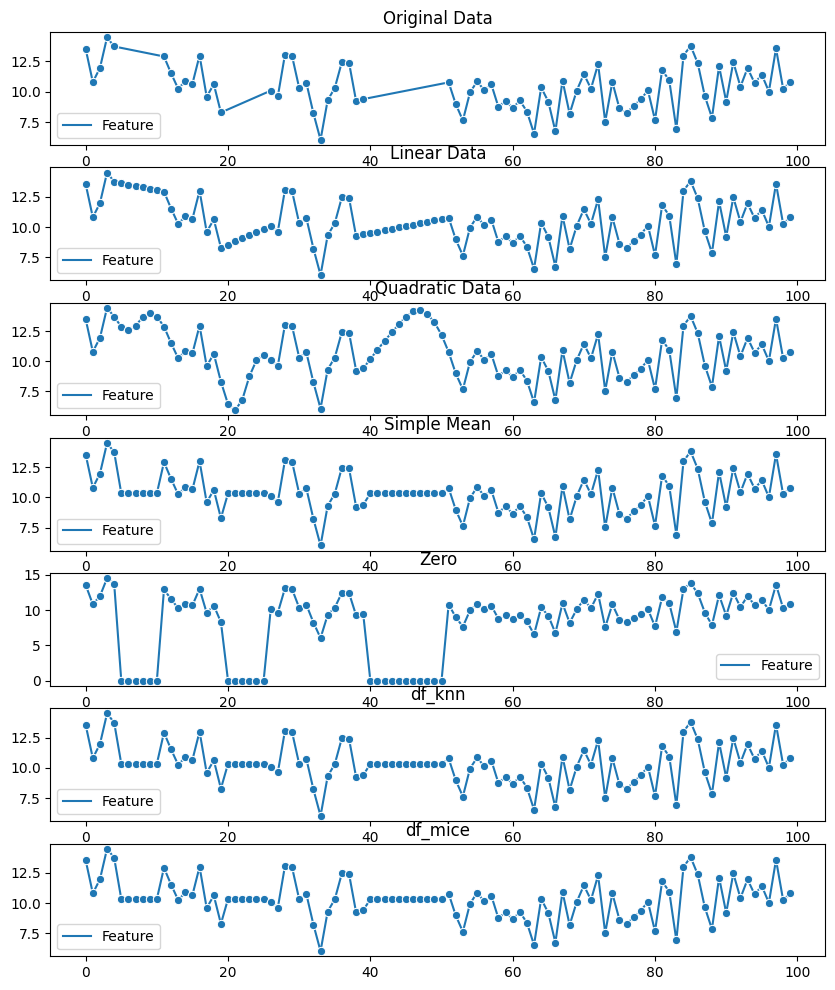

In [22]:
# 시각화를 통해서 어떤 식으로 변환하는지 확인

fig, axs = plt.subplots(7,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic , marker='o', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')


- 결측치를 보간하고 -> 데이터 분석, 모델링을 하면서 나오는 평가지표로 성능을 비교할 수 있다.

# 필수과제1
- NA값이 있는 데이터를 공유할 예정 
- 해당 NA값들을 위의 나온 방법을 가지고 실제 결측치를 대체해 주세요.
- 결측치를 대체한 후에 groupby를 통한 다른 피처들과의 관계를 비교하면서 값들이 어떤 식으로 대체되었는지를 정리해 주세요.

### 필수과제 1-1
- 4개의 피처가 있는데, 1개 피처만 NA값이 있어서 -> 이걸 위의 방법으로 대체한 후에, 다른 컬럼들과의 관계를 통해서 어떤 식으로 값들이 변화하는지

### 필수과제 1-2
- 기존의 원본데이터와, NA값을 대체한 데이터들의 차이를 비교해서 정리해 주세요.


- 필수과제 데이터를 드리면서, 원본데이터를 드릴 예정, 여러분들이 직접 NA값의 구간을 만들어서 원본데이터에서, NA값을 만들고 그 후에 이제 비교분석을 하셔야 합니다.

- 추가적으로 시각화를 통해서 도메인에 따른 결측치 처리를 분석하면서 공유하셔도 됩니다.

### 
- 주석으로 설명을 못하면 과제를 한 게 아니다.
- 본인의 언어로 정리해서 과제를 잘 해주세요.